# The reference system

> **Goal**: Explain the reference system used for crystal orientation in FTIR and EBSD

## 1. The spherical coordinate system

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/3D_Spherical.svg/1024px-3D_Spherical.svg.png" alt="image.png" style="zoom:55%;" />

Spherical coordinates $(r, \theta, \varphi)$ as used in physics (ISO 80000-2:2019), being $r$ the radial distance (distance to origin), polar angle $\theta$ (theta) (angle with respect to polar/zenith z-axis), and azimuthal angle $\varphi$ or $\phi$ (phi) (angle of rotation from the initial meridian plane).

> ⚠️ **Warning:**
> The angles $\theta$ and $\varphi$/$\phi$ in Asimov et al. (2006) are interchanged with respect to the convention used in physics (see https://en.wikipedia.org/wiki/Spherical_coordinate_system). To avoid confusion, perhaps it would be a good idea to rename them (alpha and beta?) since strictly speaking they are angles with respect to crystallographic axes, not to the reference system (although later we will make them coincide).

## 2. The FTIR reference frame

To establish a consistent coordinate frame and estimate the orientation of the crystals in FTIR we will have to consider the following:

- the microscope stage/sample pair
- the position of the reference transmittance envelope with respect to the reference system of the microscope
- the position of the crystal elements (axes, planes, etc.) with respect to the transmitance envelope

We start by defining that all coordinate systems used will be right handed, which implies the right hand rule for the sense of rotations (positive rotation counter-clockwise). To determine the full orientation of a crystal, it is necessary to define a Cartesian reference frame for the crystal lattice. The unit cell is commonly described using three lengths, $a$, $b$ and $c$ and three angles $α$, $β$, $γ$ as depicted in the figure below. For a general case:

- $a$, $b$ and $c$ form a right handed set.
- $c$ is always parallel to the $z$ axis.
- $b$ always lies in the $yz$ plane, at an angle $α$ respect to $c$
- $a$ is pointed such that it is an angle $β$ to $c$ and $γ$ to $b$

![EBSD_ref_frame](https://raw.githubusercontent.com/bertopadron/FTIR-EBSD/main/notebooks2learn/imgs/EBSD_unit_cell_convention.png)

As olivine crystal is orthorhombic, the axes defining the olivine unit cell are perpendicular to each other and thus the $a$-, $b$- and $c$-axes are parallel to $x$, $y$, and $z$, respectively.

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import ftir_funct as f

module FTIR v.2024.1.18 imported


We will use the ``sph2cart`` function to convert from spherical coordinates (magnitude, azimuth, polar) to cartesian coordinates and check. **Important**: angles must be provided in radians. If the polar angle is not provided, the coordinate is assumed to lie on the XY plane but here we will make all the inputs explicit.

In [2]:
# check that a phi (azimuth) angle of 0 and a theta angle of 90 is the coordinates (1,0,0)
test1 = f.sph2cart(r=1, azimuth=0, polar=np.deg2rad(90))
print(np.around(test1, 1))

[1. 0. 0.]


In [3]:
# check that a phi (azimuth) angle of 90 and a theta (polar) of 90 is the coordinates (0,1,0)
test2 = f.sph2cart(1, azimuth=np.deg2rad(90), polar=np.deg2rad(90))
print(np.around(test2, 1))

[0. 1. 0.]


In [4]:
# check that for a theta (polar) angle of 0, whatever the phi (azimuth) angle, the coordinate is (0,0,1)
for angle in range(0, 90, 20):
    print(
        f'azimuth = {angle}, {f.sph2cart(1, azimuth=np.deg2rad(angle), polar=0)}')

azimuth = 0, (0.0, 0.0, 1.0)
azimuth = 20, (0.0, 0.0, 1.0)
azimuth = 40, (0.0, 0.0, 1.0)
azimuth = 60, (0.0, 0.0, 1.0)
azimuth = 80, (0.0, 0.0, 1.0)



## 3. The reference transmittance envelope

The transmittance figure in our coordinate system is as follows:

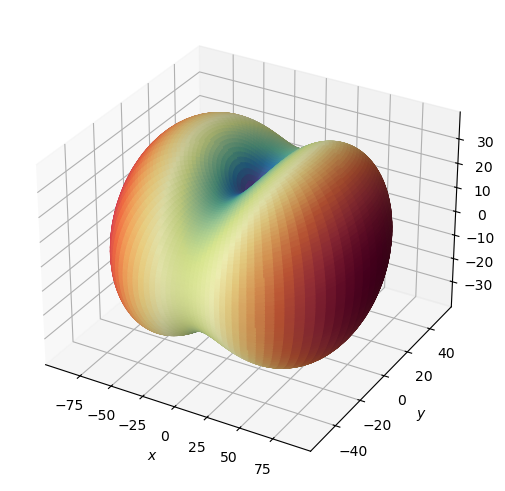

In [5]:
# generate a mesh of spherical/polar coordinates
polar, azimuths = f.regular_S2_grid(n_squared=100)

# estimate T values
T = f.Tvalues(trans=(90, 50, 20), azimuth=azimuths, polar=polar)

# convert from spherical to cartesian coordinates
x, y, z = f.sph2cart(T, azimuths, polar)

# normalize colors for T values to max and min values
Tmax, Tmin = T.max(), T.min()
Tcolors = (T - Tmin) / (Tmax - Tmin)

# make figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors))
_ = ax.set_xlabel(r'$x$'), ax.set_ylabel(r'$y$'), ax.set_zlabel(r'$z$')

This would be an example of the reference transmittance envelope for a given thickness and wavelength. Note that the maximum value of 90 (dark red maxima), corresponding to $T_a$, aligns with the direction of the $x$-axis in Cartesian space, and the minimum value of 20 (dark blue minima), corresponding to $T_c$, aligns with the direction of the $z$-axis, as established in the previous figure. Thus, we now have our olivine positioned with the crystallographic a-axis aligned with the x-axis, the b-axis aligned with the y-axis and the c-axis aligned with the z-axis.

Given these assumptions, the approach to determining the crystallographic orientation from a few transmittance measurements is to rotate them to coincide with the reference transmittance surface. Once this is achieved, the inverse rotation will give us the orientation of the crystal in our reference system. For this see notebook 01: The minimisation procedure.

In [6]:
import sys
import matplotlib as mpl
from datetime import date    
today = date.today().isoformat()

print(f'Notebook tested in {today} using:')
print('Python', sys.version)
print('Matplotlib', mpl.__version__)

Notebook tested in 2024-01-18 using:
Python 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:15:57) [MSC v.1916 64 bit (AMD64)]
Matplotlib 3.8.0
